In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib.ticker as mtick

Primero se leen los datos históricos

In [115]:
df = pd.read_csv('./Food_Inspections.csv')

## Summary

In [116]:
df.sample(5,random_state=2020)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
143131,1361461,PIE-EYED PIZZERIA,PIE-EYED PIZZERIA,1490003.0,Restaurant,Risk 2 (Medium),1111 W CHICAGO AVE,CHICAGO,IL,60642.0,10/31/2013,Canvass,Pass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.896151,-87.655800,"(-87.65579995878325, 41.89615078732556)"
101298,1631289,PORTILLO'S HOT DOGS,PORTILLO'S HOT DOGS,39472.0,Restaurant,Risk 1 (High),100 W ONTARIO ST,CHICAGO,IL,60654.0,02/03/2016,Complaint,Fail,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.893338,-87.631244,"(-87.63124449621304, 41.89333773718407)"
166932,1096608,HYATT REGENCY MCCORMICK PLACE,THIRD STAR/SIXES & EIGHTS/MAIN KITCHEN,63178.0,RESTAURANT/BAR,Risk 1 (High),2233 S DR MARTIN LUTHER KING JR DR,CHICAGO,IL,60616.0,11/02/2012,Complaint,Fail,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.852076,-87.618851,"(-87.61885080391755, 41.852075574499366)"
57998,2129691,WENTWORTH SEAFOOD HOUSE,WENTWORTH SEAFOOD HOUSE,2574484.0,Restaurant,Risk 1 (High),2229 S WENTWORTH AVE,CHICAGO,IL,60616.0,12/26/2017,License,No Entry,NaN,41.852023,-87.631848,"(-87.63184844304722, 41.852023150198406)"
3626,679544,NELSON FOOD & LIQUOR,NELSON FOOD & LIQUOR,2114980.0,Grocery Store,Risk 3 (Low),3201 W 63RD PL,CHICAGO,IL,60629.0,04/04/2012,License Re-Inspection,Pass,NaN,41.777936,-87.703224,"(-87.70322438611822, 41.77793576167579)"


In [117]:
df.shape

(215067, 17)

## Preprocesamiento

Se hace una limpieza en los nombres de columnas, em los datos y un preprocesamiento rápido para mejorar las visualizaciones del EDA.

In [118]:
def estandariza_variables(archivo):
    columnas_antes=archivo.columns
    archivo.columns=archivo.columns.str.replace(' ','_')
    archivo.columns=archivo.columns.str.replace('#','num')
    archivo.columns=archivo.columns.str.lower()
    print('Las variables originales son:\n\n',columnas_antes,'\n','\nY se renombran como:\n\n',archivo.columns)

In [119]:
estandariza_variables(df)

Las variables originales son:

 Index(['Inspection ID', 'DBA Name', 'AKA Name', 'License #', 'Facility Type',
       'Risk', 'Address', 'City', 'State', 'Zip', 'Inspection Date',
       'Inspection Type', 'Results', 'Violations', 'Latitude', 'Longitude',
       'Location'],
      dtype='object') 
 
Y se renombran como:

 Index(['inspection_id', 'dba_name', 'aka_name', 'license_num', 'facility_type',
       'risk', 'address', 'city', 'state', 'zip', 'inspection_date',
       'inspection_type', 'results', 'violations', 'latitude', 'longitude',
       'location'],
      dtype='object')


Luego pasamos los datos a minúsculas:

In [120]:
def cambiar_minusculas_variable(archivo,variable):
    archivo[variable]=archivo[variable].str.lower()

In [121]:
cambiar_minusculas_variable(df,'dba_name')
cambiar_minusculas_variable(df,'aka_name')
cambiar_minusculas_variable(df,'facility_type')
cambiar_minusculas_variable(df,'risk')
cambiar_minusculas_variable(df,'address')
cambiar_minusculas_variable(df,'city')
cambiar_minusculas_variable(df,'state')
cambiar_minusculas_variable(df,'inspection_type')
cambiar_minusculas_variable(df,'results')
cambiar_minusculas_variable(df,'violations')

Verificamos el tipo de dato para cada columna.

In [122]:
def tipo_variables(archivo):
    print('\nTipo de variables:\n', archivo.dtypes)

In [123]:
tipo_variables(df)


Tipo de variables:
 inspection_id        int64
dba_name            object
aka_name            object
license_num        float64
facility_type       object
risk                object
address             object
city                object
state               object
zip                float64
inspection_date     object
inspection_type     object
results             object
violations          object
latitude           float64
longitude          float64
location            object
dtype: object


Y corregimos los tipos de datos de las variables al correcto de acuerdo a la descripción de las variables:

In [124]:
df['inspection_id']=df['inspection_id'].astype('str')
df['license_num']=df['license_num'].astype('str')
df['zip']=df['zip'].astype('str')
df['license_num']=df['license_num'].astype('str')
df['inspection_date'] = pd.to_datetime(df['inspection_date'], format='%m/%d/%Y')

In [125]:
tipo_variables(df)


Tipo de variables:
 inspection_id              object
dba_name                   object
aka_name                   object
license_num                object
facility_type              object
risk                       object
address                    object
city                       object
state                      object
zip                        object
inspection_date    datetime64[ns]
inspection_type            object
results                    object
violations                 object
latitude                  float64
longitude                 float64
location                   object
dtype: object


Quedando de la siguiente forma:

In [126]:
df.sample(5,random_state=2020)

,inspection_id,dba_name,aka_name,license_num,facility_type,risk,address,city,state,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location
143131,1361461,pie-eyed pizzeria,pie-eyed pizzeria,1490003.0,restaurant,risk 2 (medium),1111 w chicago ave,chicago,il,60642.0,2013-10-31,canvass,pass,33. food and non-food contact equipment utensi...,41.896151,-87.655800,"(-87.65579995878325, 41.89615078732556)"
101298,1631289,portillo's hot dogs,portillo's hot dogs,39472.0,restaurant,risk 1 (high),100 w ontario st,chicago,il,60654.0,2016-02-03,complaint,fail,18. no evidence of rodent or insect outer open...,41.893338,-87.631244,"(-87.63124449621304, 41.89333773718407)"
166932,1096608,hyatt regency mccormick place,third star/sixes & eights/main kitchen,63178.0,restaurant/bar,risk 1 (high),2233 s dr martin luther king jr dr,chicago,il,60616.0,2012-11-02,complaint,fail,18. no evidence of rodent or insect outer open...,41.852076,-87.618851,"(-87.61885080391755, 41.852075574499366)"
57998,2129691,wentworth seafood house,wentworth seafood house,2574484.0,restaurant,risk 1 (high),2229 s wentworth ave,chicago,il,60616.0,2017-12-26,license,no entry,NaN,41.852023,-87.631848,"(-87.63184844304722, 41.852023150198406)"
3626,679544,nelson food & liquor,nelson food & liquor,2114980.0,grocery store,risk 3 (low),3201 w 63rd pl,chicago,il,60629.0,2012-04-04,license re-inspection,pass,NaN,41.777936,-87.703224,"(-87.70322438611822, 41.77793576167579)"


Luego revisamos los posibles valores de la variable con el resultado de la inspección:

In [127]:
df.results.unique()

array(['no entry', 'pass', 'out of business', 'fail',
       'pass w/ conditions', 'not ready', 'business not located'],
      dtype=object)

In [128]:
dic_results = {'pass': 'pass',
               'out of business': 'others',
               'no entry': 'others',
               'fail': 'fail',
               'not ready': 'others',
               'pass w/ conditions': 'pass w/ conditions',
               'business not located': 'others'}
df['results_des'] = df['results']
df['results'] = df.results.map(dic_results)

In [129]:
colores = ['red', 'blue', 'green', 'yellow']

## GEDA

### Mapa

En el mapa se muestra la ubicación de todos los restaurantes, distinguiendo los distintos tipos de resultados de la Inspección. Dado que el mapa es interactivo, no fue posible mantener visible el mapa por lo que agregamos una imagen del mismo después de código que genera dicho mapa:

In [130]:
df.results.unique()

array(['others', 'pass', 'fail', 'pass w/ conditions'], dtype=object)

In [131]:
fecha_inicial = '2021-01-01'
df_map = df[(df.inspection_date >= fecha_inicial) & (df.results != 'others')]
fig = px.scatter_mapbox(df_map.sort_values(by='results'), 
                        lat = "latitude", 
                        lon = "longitude",
                        color = "results",
                        hover_name = "aka_name",
                        color_discrete_sequence = ['red', 'green', 'yellow'],
                        opacity = 0.8,
                        zoom = 9, 
                        mapbox_style= "open-street-map",
                        center = {"lat": 41.9, "lon": -87.7})
fig.show()

<img src="https://dl.dropboxusercontent.com/s/pnqr87267dwdv2b/Mapa.jpeg?dl=0" heigth="500" width="1500">

### Tipo de resultado

Los resultados que arroja la inspección son importantes, por lo que en la siguiente gráfica se muestra el conteo de cada uno. Podemos ver que hay más del doble de establecimientos que pasan la inspección de aquellos que fallan.

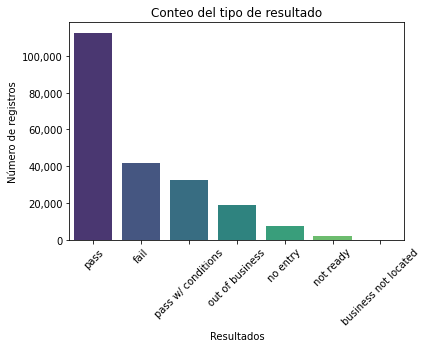

In [132]:
conteo_resultados = sns.countplot(x='results_des',
                  data=df,
                  order = df['results_des'].value_counts().index,
                  palette="viridis")
plt.title('Conteo del tipo de resultado')
plt.xlabel('Resultados')
plt.ylabel('Número de registros')
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
conteo_resultados.yaxis.set_major_formatter(tick)
plt.xticks(rotation=45)
plt.show()

### Riesgo

Una de las variables que más infuyen en el resultado es la llamada *Risk*. Su efecto se puede ver en la siguiente gráfica de barras, donde se muestran los resultados por cada tipo de *riesgo* .

Decidimos agrupar los datos que no definen si un establecimiento pasó la inspección o no en la variable *others* .

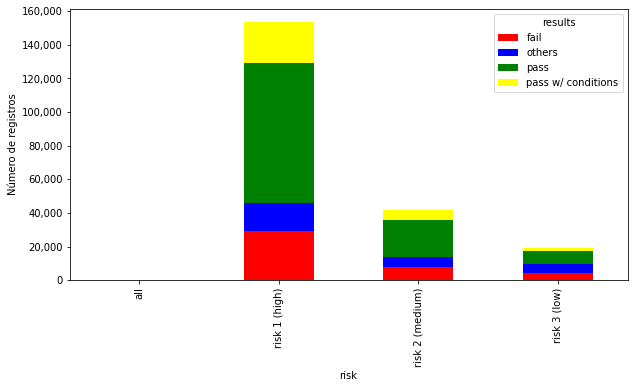

In [133]:
riesgo = df[['risk', 'results', 'inspection_id']].\
groupby(['risk', 'results']).count().unstack()['inspection_id'].\
plot.bar(stacked=True, 
         figsize=(10,5), 
         ylabel = 'Número de registros', 
         color = colores)
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
riesgo.yaxis.set_major_formatter(tick)
plt.show()

### Violaciones

Otra variable que influye en gran medida en los resultados es la de las violaciones. En este caso se grafican todas aquellos registros con violaciones (True) y todas los registros sin violaciones (False) para cada uno de los resultados.

<ipython-input-134-90140151d6de>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



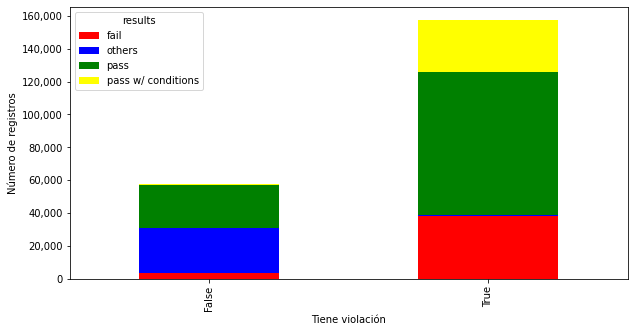

In [134]:
df_viol = df[['inspection_id','violations', 'results']]
df_viol['violation'] = df_viol.violations.notnull()
viol = df_viol[['violation', 'results', 'inspection_id']].sort_values(by='results').\
groupby(['violation', 'results']).count().unstack()['inspection_id'].\
plot.bar(stacked=True, 
         figsize=(10,5), 
         xlabel = 'Tiene violación',
         ylabel = 'Número de registros',
         color= colores)
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
viol.yaxis.set_major_formatter(tick)
plt.show()